In [38]:
import numpy as np

import pandas as pd
import re
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_context("talk")
import datetime
# Plot settings
plt.rcParams['figure.figsize'] = (8, 8)
plt.rcParams['font.size'] = 12

In [39]:
dataset = pd.read_excel("200428 Defects test dataset.xlsx")

In [40]:
data = dataset.copy()

In [41]:
data.head(3)

,_date,_deleted,defectid,ownerid,projectid,phase,unitid,caseid,status,location,...,formfield,ccids,rectifieddate,rectifiedby,interventiondate,name,counterid,estimatedCost,actualCost,predictedcompletiontime
0,1583318036590,0,fc647bd0d07f2b31,DA39A3EE5E6B4B0D3255BFEF95601890AFD80709,NaN,0,NaN,NaN,2,NaN,...,NaN,NaN,0,NaN,0,NaN,NaN,0.0,0.0,0.0
1,1572851958589,0,31d28cfd338e3065,55CC5EDF2129EA75C7C057FCC8EE4C7F183F13ED,EB352DF3E27FA62A2B648E898E4D66,2,CDLH2O0722,31d28cfdef150045,7,BR3 - Bedroom 3,...,NaN,NaN,0,NaN,0,NaN,NaN,0.0,0.0,0.0
2,1515651182746,0,66f7bef6e9bafb19,5C452849A5F833D8DE2F58EFD889B79E0672BEEA,EB352DF3E27FA62A2B648E898E4D66,2,CDLH2O0212,61941b8022b566ef,7,Living,...,NaN,NaN,0,NaN,0,NaN,NaN,0.0,0.0,0.0


In [42]:
data.columns.values

array(['_date', '_deleted', 'defectid', 'ownerid', 'projectid', 'phase',
       'unitid', 'caseid', 'status', 'location', 'type', 'description',
       'priority', 'lodgedate', 'confirmationdate', 'confirmedby',
       'completiondate', 'completedby', 'closingdate', 'closedby',
       'contractorid', 'rejecteddate', 'rejectedby', 'subtype', 'lodgeby',
       'targetdate', 'number', 'deletedby', 'planid', 'formid',
       'formfield', 'ccids', 'rectifieddate', 'rectifiedby',
       'interventiondate', 'name', 'counterid', 'estimatedCost',
       'actualCost', 'predictedcompletiontime'], dtype=object)

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 40 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   _date                    50000 non-null  int64  
 1   _deleted                 50000 non-null  int64  
 2   defectid                 50000 non-null  object 
 3   ownerid                  50000 non-null  object 
 4   projectid                49999 non-null  object 
 5   phase                    50000 non-null  int64  
 6   unitid                   49999 non-null  object 
 7   caseid                   49999 non-null  object 
 8   status                   50000 non-null  int64  
 9   location                 49281 non-null  object 
 10  type                     49232 non-null  object 
 11  description              49879 non-null  object 
 12  priority                 50000 non-null  int64  
 13  lodgedate                50000 non-null  int64  
 14  confirmationdate      

## Delete the empty columns
We observe that there are many empty columns namely: `deletedby`, `formid`, `formfield`, `ccids`, `rectifiedby`, `name`, `counterid`    

In [44]:
data = data.drop(axis = 1, labels = ["deletedby", "formid", "formfield", "ccids", "rectifiedby", "name", "counterid", "subtype","_date", "rectifieddate", "interventiondate", "rejecteddate", "targetdate"])

In [45]:
data = data[data.lodgedate != 0]

In [46]:
data.describe()

,_deleted,phase,status,priority,lodgedate,confirmationdate,completiondate,closingdate,estimatedCost,actualCost,predictedcompletiontime
count,49999.000000,49999.000000,49999.000000,49999.000000,4.999900e+04,4.999900e+04,4.999900e+04,4.999900e+04,49992.0,49992.0,49999.000000
mean,0.000040,1.629273,6.357927,0.000160,1.503193e+12,1.467628e+12,1.408825e+12,1.059504e+12,0.0,0.0,0.543698
std,0.006325,0.639422,1.243733,0.012648,3.480626e+10,2.319323e+11,3.696161e+11,6.883441e+11,0.0,0.0,3.190857
min,0.000000,0.000000,1.000000,0.000000,1.433751e+12,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,-1.000000
25%,0.000000,1.000000,5.000000,0.000000,1.477816e+12,1.477305e+12,1.478511e+12,0.000000e+00,0.0,0.0,0.000000
50%,0.000000,2.000000,7.000000,0.000000,1.503893e+12,1.503375e+12,1.505723e+12,1.482395e+12,0.0,0.0,0.000000
75%,0.000000,2.000000,7.000000,0.000000,1.523007e+12,1.522914e+12,1.522654e+12,1.522638e+12,0.0,0.0,0.000000
max,1.000000,2.000000,8.000000,1.000000,1.587368e+12,1.586228e+12,1.586144e+12,1.585896e+12,0.0,0.0,45.246868


# Part 1: Exploratory Data Analysis

In this section, we will make a serie of exploratory visualizations and interpret them.
We will ensure to create pipelines for repeatability



### Decoding of all the dates into 00:00 (min:sec) ###

Put the date in a ascending order referring to the variable lodgedate

In [47]:
data = data.sort_values("lodgedate")

In [48]:
 print("min =", data.lodgedate.min(), "max =",data.lodgedate.max())

min = 1433751443674 max = 1587368479564


In [49]:
#Variables with a timestamp format
dates = ["lodgedate", "confirmationdate", "completiondate", "closingdate"]

In [50]:
def date_month_year(data,labels):
    for col in labels:
        data[col] = data[col].apply(lambda x: int(str(x)[:10]))
        data[col] = data[col].apply(lambda x: pd.Timestamp(x, unit='s'))
        data[col] = pd.to_datetime(data[col])
        data[col] = data[col].dt.to_period('D')
    return data   

In [51]:
def add_month(data):
    data["month"] = data["lodgedate"].apply(lambda x: x.to_timestamp().strftime('%B'))
    return data

In [52]:
data = date_month_year(data, dates)

In [53]:
data = add_month(data)

In [54]:
data[dates].head(3)

,lodgedate,confirmationdate,completiondate,closingdate
1,2015-06-08,2015-06-08,2015-06-15,2015-06-15
2,2015-06-08,2015-06-08,2015-06-15,2015-06-15
3,2015-06-09,2015-06-09,2015-06-16,2015-06-22


### Overview of the number of defect depending on different parameters  ###

In [55]:
variables = ["lodgedate", "unitid", "projectid", "contractorid"]

Since we have around 50000 rows in our dataset, we have to be able to prioritize the information on our plots. 
<br> We choose to prioritize by the number of defects. k represents the k first items in terms of number of defects, in a descending order

In [56]:
def defect_index(data, index, k):      # group by the index
    data = data.groupby(index).count()[["defectid"]].reset_index().iloc[:k]
    data['cumul'] = data['defectid'].cumsum()
    return data

def defect_index_order(data, index, k): #group by the index then order in a descending order
    return data.groupby(index).count()[["defectid"]].sort_values("defectid", ascending = False).reset_index().iloc[:k]

def plot_defect_order(data, x, y, k):   # plot the number of defects depending on the label
    fig, ax = plt.subplots()
    sns.barplot(
        data = defect_index_order(data, x, k),
        y = y,
        x = x, 
        ax=ax)
    plt.xticks(rotation = 90)
    plt.title("number of defects depending on "+x)

In [57]:
def plot_defect(data, x, y, k):
    fig, ax = plt.subplots()
    sns.barplot(
        data = defect_index(data, x, k),
        y = y,
        x = x, 
        ax=ax)
#     sns.lineplot(
#         data = defect_index(data, x, k),
#         y = yy,
#         x = x, 
#         ax=ax)
    plt.title("number of defects depending on "+ x)
    plt.xticks(rotation = 90)

In [58]:
defect_index(data,  "projectid", 3)

,projectid,defectid,cumul
0,1,688,688
1,2,747,1435
2,3,89,1524


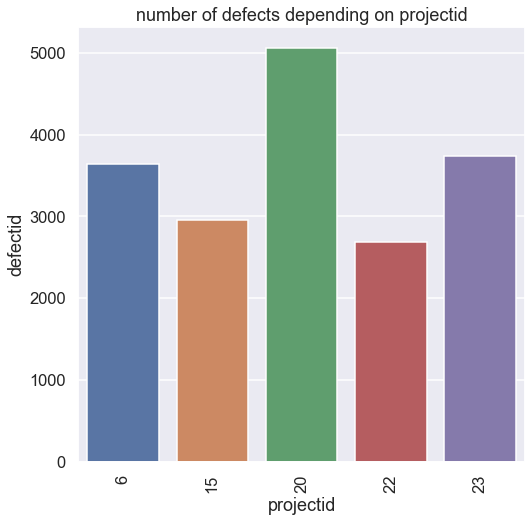

In [59]:
plot_defect_order(data, "projectid", "defectid", 5)

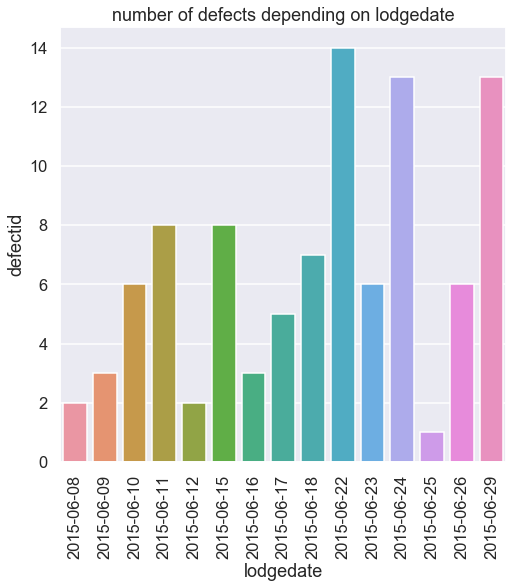

In [84]:
plot_defect(data, "lodgedate", "defectid", 15)

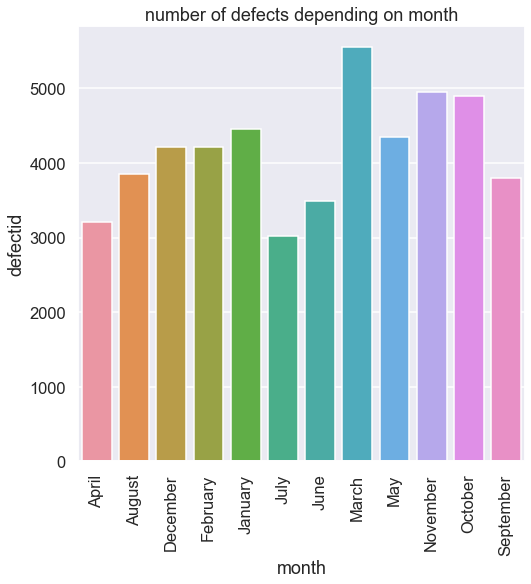

In [61]:
plot_defect(data, "month", "defectid", 12)

Pairing this graph with the revenues generated and the costs per month, we derive from the most performing months. Many parameters may have an impact like the weather. We would then be able to have a better prediction of performance

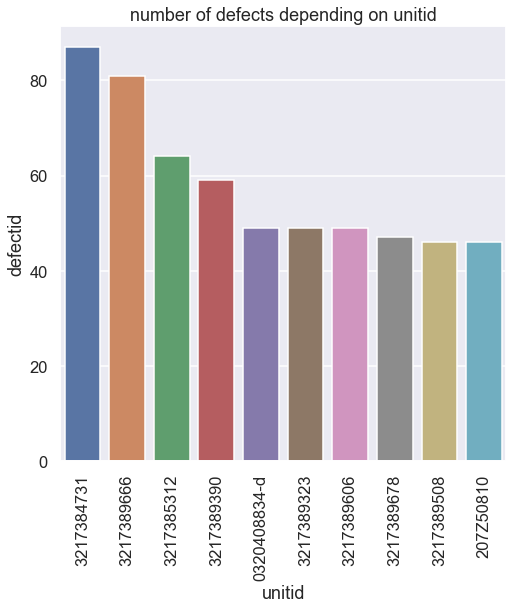

In [62]:
plot_defect_order(data, "unitid", "defectid", 10)

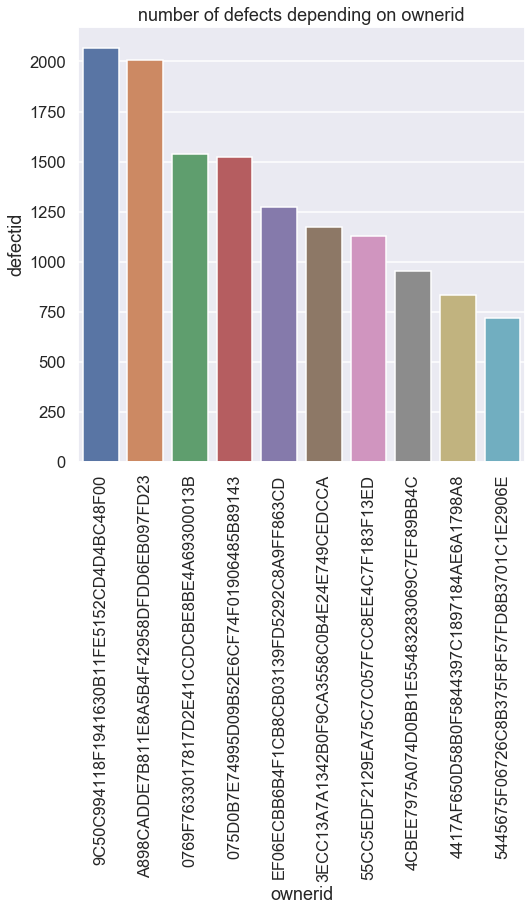

In [63]:
plot_defect_order(data, "ownerid", "defectid", 10)

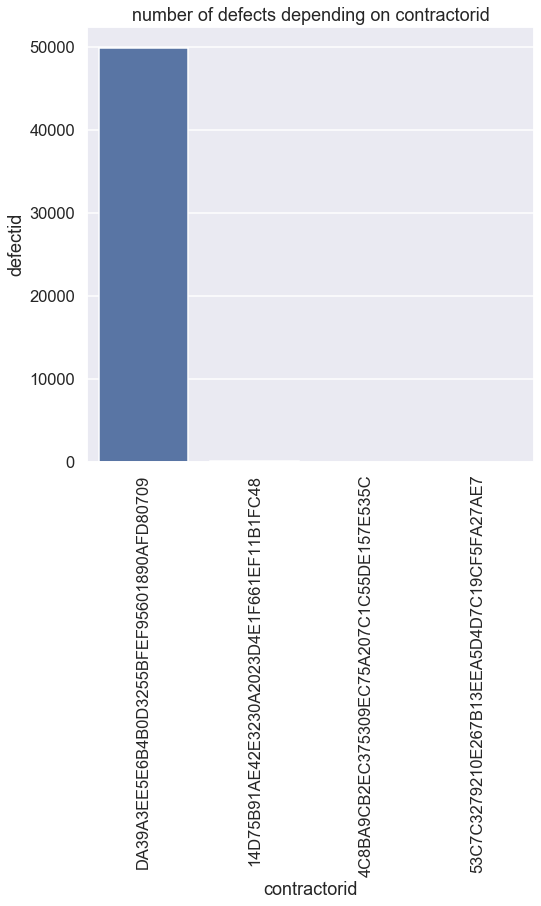

In [64]:
plot_defect_order(data, "contractorid", "defectid", 10)


### Predicted Completion time
It would be a great advantage for the company if we could predict with a great accuracy the completion time of our projects. With that in mind, we will first try to study the distribution of our current predicted completion time
We begin by examining a raincloud plot (a combination of a KDE, a histogram, a strip plot, and a box plot) of our target variable `predictedcompletiontime`.  

In [65]:
#We select the part of the dataset where the predicted completion time is available
bis = data[data.predictedcompletiontime != 0]

In [66]:
bis.describe()

,_deleted,phase,status,priority,estimatedCost,actualCost,predictedcompletiontime
count,1860.0,1860.000000,1860.000000,1860.000000,1860.0,1860.0,1860.000000
mean,0.0,0.019355,4.525806,0.001075,0.0,0.0,14.615234
std,0.0,0.195846,2.122874,0.032782,0.0,0.0,8.250144
min,0.0,0.000000,2.000000,0.000000,0.0,0.0,-1.000000
25%,0.0,0.000000,2.000000,0.000000,0.0,0.0,8.301119
50%,0.0,0.000000,5.000000,0.000000,0.0,0.0,11.957873
75%,0.0,0.000000,7.000000,0.000000,0.0,0.0,20.307801
max,0.0,2.000000,7.000000,1.000000,0.0,0.0,45.246868


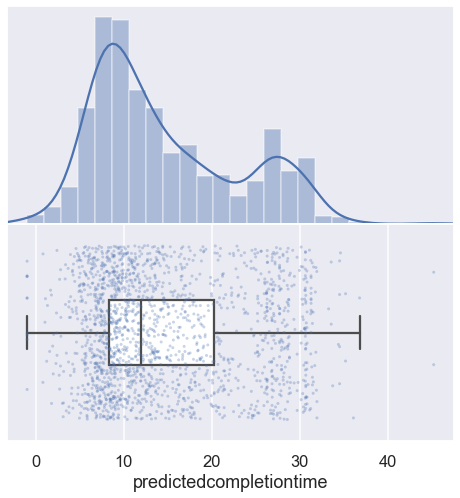

In [67]:
fig, axs = plt.subplots(nrows=2)

sns.distplot(
    bis['predictedcompletiontime'], 
    ax=axs[0]
)
sns.stripplot(
    bis['predictedcompletiontime'], 
    jitter=0.4, 
    size=3,
    ax=axs[1],
    alpha=0.3
)
sns.boxplot(
    bis['predictedcompletiontime'],
    width=0.3, 
    ax=axs[1],
    showfliers=False,
)

# Align axes
spacer = np.max(bis['predictedcompletiontime']) * 0.05
xmin = np.min(bis['predictedcompletiontime']) - spacer
xmax = np.max(bis['predictedcompletiontime']) + spacer
axs[0].set_xlim((xmin, xmax))
axs[1].set_xlim((xmin, xmax))

# Remove some axis text
axs[0].xaxis.set_visible(False)
axs[0].yaxis.set_visible(False)
axs[1].yaxis.set_visible(False)

# Put the two plots together
plt.subplots_adjust(hspace=0)

# Adjust boxplot fill to be white
axs[1].artists[0].set_facecolor('white')

The distribution of the predicted completion time is a bimodal right skewed distribution. On average we plan to complete a task in 15 units of time while 50% of our tasks are planned to be completed before 12 units of time.
<br> The shape of the distribution will also make it hard to build a prediction model like a linear regression since we assume a normal distribution 
<br> It would have also been interesting to have the record of the actual distribution of the completion time to compare with our prediction and improve.

 ### Estimated costs ###

The estimated and actual costs are not relevant here since there a all NaN or O. With more information we could try a continuous supervised model to predict the cost given the parameters that we already have

In [68]:
print("estimated cost=",data.estimatedCost.unique(),' actual cost=',data.actualCost.unique())

estimated cost= [ 0. nan]  actual cost= [ 0. nan]


# Part 2: Case Study: Field Performance

Now that we have an idea of the number of defects reported according to various criteria, we will try to learn a little more according to each of these criteria



Considering a certain project. Let's choose the one with the maximum number of defects reported. We seek to answer the following questions:
- **what is the proportion of high-priority defects ?** (1)
- **Who is the owner with the most defects reported?** 
- **What is the average time of intervention on those defects?**
- **At what phase were these defects before they were reported?**

In [69]:
# Project with the highest number of defects 
project_name = data.projectid.value_counts().sort_values(ascending = False).index[0]
print("The project with the highest number of defects is project", str(project_name))

The project with the highest number of defects is project 20


In [70]:
data_project = data[data.projectid == 20]  # New dataset with only that project

### First the ratio of top priority defects for this project ###

In [71]:
def ratio(data):
    num_zero = data_project.priority.value_counts().iloc[0]
    try:
        num_one = data_project.priority.value_counts().iloc[1]
        ratio = num_one / (num_zero + num_one)
    except:
        ratio = 0
    return ratio*100

In [72]:
ratio = ratio(data_project)
print("For this project, the ratio of defects of priority 1 is:", ratio, "percents")

For this project, the ratio of defects of priority 1 is: 0 percents


### Map of the locations in the project where defects were reported ###

In [73]:
def mapping(hue):
    fig, ax = plt.subplots(figsize=(9,6))
    sns.countplot(x='location',hue=hue, data=data_project, ax=ax)
    ax.set_title('Number of defects per location')
    ax.set_ylabel("Number of defects")
    ax.set_xlabel("location")

    plt.xticks(rotation = 90)

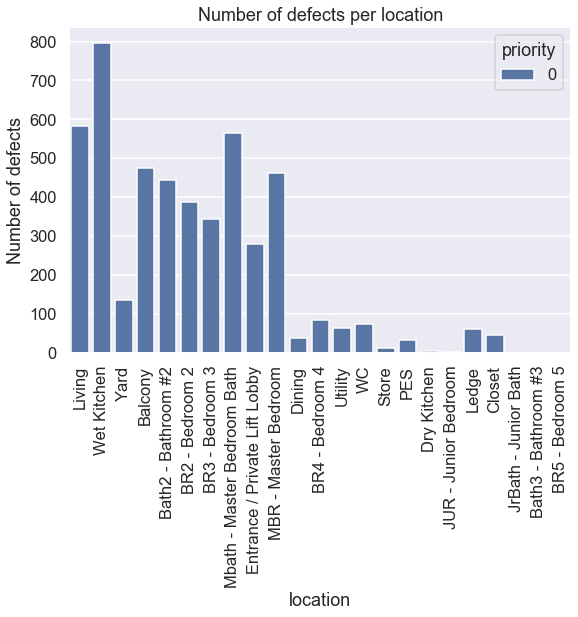

In [74]:
mapping("priority")

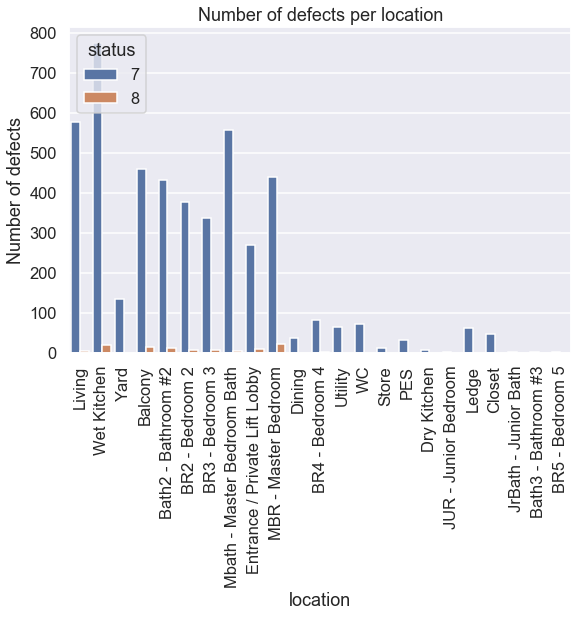

In [75]:
mapping("status")

### Now let's study the owners of the reported defects in this project ###

In [76]:
def top_reporters(data, k):
    a = data_project.groupby('ownerid').count().sort_values("defectid", ascending = False).iloc[:3].index
    return [i for i in a]

In [77]:
top = top_reporters(data_project, 3)

for i in top:
    print("Defects have been mostly reported by ", i)

Defects have been mostly reported by  559994E8D87022ADA48E59F668BA578AAC2603DF
Defects have been mostly reported by  787E0A8D293F1AAA396AF2E739D181859C1A3BD6
Defects have been mostly reported by  84AE483DF56EC9B5EF6B05D565C621B36C1EB48C


### What about the completion time? ###

In [78]:
data_project_compl_time = data_project[data_project.predictedcompletiontime != 0]

In [79]:
data_project_compl_time.describe()["predictedcompletiontime"]

count    18.000000
mean     25.271016
std       2.758296
min      15.096421
25%      25.204591
50%      25.224459
75%      26.275087
max      28.954741
Name: predictedcompletiontime, dtype: float64

We lack enough data to compare the statistic of completion time (mean, median) of this project to the norms of the others projects calculated at the beginning of the study. Also, we need to take into consideration the scale of this project to draw more accurate conclusions about the deadlines

### Time between confirmation date and report ###

We build a pipeline to compute in seconds the difference in time between two datetime columns and add it as a column

In [80]:
def add_delay(data, col1, col2):
    l = []
    for i in range(len(data)):
        a = data[col1].iloc[i].to_timestamp()
        b = data[col2].iloc[i].to_timestamp()
        c = a - b
        l.append(c.days)
    data["delay"] = pd.Series(l, index = data.index)
    return data

In [81]:
copy = data_project.copy()
data_project_delay = add_delay(copy, "confirmationdate", "lodgedate")
data_project_delay.head(3)

,_deleted,defectid,ownerid,projectid,phase,unitid,caseid,status,location,type,...,contractorid,rejectedby,lodgeby,number,planid,estimatedCost,actualCost,predictedcompletiontime,month,delay
28597,0,c704209ab1d57e0c,48ABD6FB1B91A5F84F977DF3BAE8F088705BFC06,20,2,3217384887,5bdb88b64b6ab90b,7,Living,Door / Frame / Architrave,...,DA39A3EE5E6B4B0D3255BFEF95601890AFD80709,DA39A3EE5E6B4B0D3255BFEF95601890AFD80709,48ABD6FB1B91A5F84F977DF3BAE8F088705BFC06,H1-11,NaN,0.0,0.0,0.0,November,2
28598,0,c704209ab8d4b472,48ABD6FB1B91A5F84F977DF3BAE8F088705BFC06,20,2,3217384887,5bdb88b64b6ab90b,7,Wet Kitchen,Kitchen Cabinet,...,DA39A3EE5E6B4B0D3255BFEF95601890AFD80709,DA39A3EE5E6B4B0D3255BFEF95601890AFD80709,48ABD6FB1B91A5F84F977DF3BAE8F088705BFC06,H1-24,NaN,0.0,0.0,0.0,November,2
28599,0,c704209a6fc20519,48ABD6FB1B91A5F84F977DF3BAE8F088705BFC06,20,2,3217384887,5bdb88b64b6ab90b,7,Wet Kitchen,Tiling,...,DA39A3EE5E6B4B0D3255BFEF95601890AFD80709,DA39A3EE5E6B4B0D3255BFEF95601890AFD80709,48ABD6FB1B91A5F84F977DF3BAE8F088705BFC06,H1-29,NaN,0.0,0.0,0.0,November,2


In [82]:
data_project_delay.delay.describe()

count     5063.000000
mean      -415.711436
std       2697.391011
min     -17957.000000
25%          2.000000
50%          5.000000
75%         10.000000
max        160.000000
Name: delay, dtype: float64

Text(0.5, 1.0, 'Histogram of the delays')

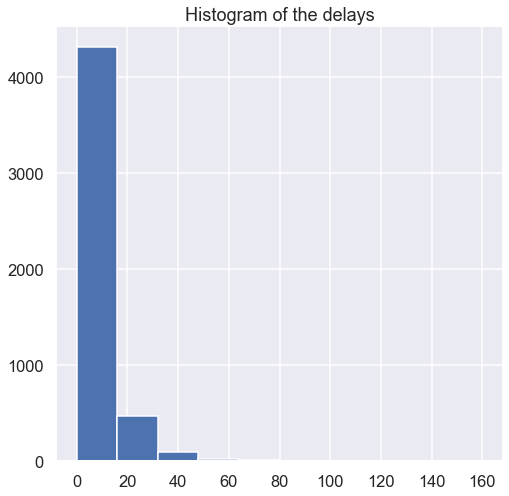

In [83]:
#remove outliers
data_project_delay[data_project_delay.delay >= 0].delay.hist()
plt.title('Histogram of the delays')

As a summary for this project: 
- we observed that all the defects reported were from low priority. 
- The 3 locations that we should pay attention to are **Wet Kitchen**, **Living and Master Bedroom Bath** since the reported the most number of defects. We may first address. 
- Maybe we should talk to **559994E8D87022ADA48E59F668BA578AAC2603DF**, **787E0A8D293F1AAA396AF2E739D181859C1A3BD6**, **84AE483DF56EC9B5EF6B05D565C621B36C1EB48C** who have the most reported defects. 
- Regarding the predicted completion time, this project will require **5/3 more time than the median project we usually do**.
- We can also say that we have the workers are not pretty responsive since we have a relatively **long time between the confirmation date and the date of the report**; the median is 5 days